In [244]:
import lightgbm as lgb
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import matplotlib

In [189]:
dataset_train = 5
dataset_test = 5

X_train = pd.read_csv('datasets/{}_X_train.csv'.format(dataset_train), low_memory=False)
X_test = pd.read_csv('datasets/{}_X_test.csv'.format(dataset_test), low_memory=False)
y_train = pd.read_csv('datasets/{}_y_train.csv'.format(dataset_train), low_memory=False, header=None)
y_test = pd.read_csv('datasets/{}_y_test.csv'.format(dataset_test), low_memory=False, header=None)
print X_train.shape, X_test.shape, y_train.shape, y_test.shape

y_train = pd.Series(y_train[0])
y_test = pd.Series(y_test[0])
print X_train.shape, X_test.shape, y_train.shape, y_test.shape

(389599, 9) (191516, 9) (389599, 1) (191516, 1)
(389599, 9) (191516, 9) (389599,) (191516,)


In [235]:
params = {'metric':'binary_error', 'is_unbalance':False}

if dataset_train == 5:
    params = {
        'learning_rate':.4,
        'n_estimators':14,
        'num_leaves':35,
        'min_data_in_leaf':27,
        'max_depth':12,
    }
elif dataset_train == 7:
    params = {
        'learning_rate':0.05,
        'n_estimators':200,
        'num_leaves':31,
        'max_depth':8,
        #'min_data_in_leaf':16,
    }
elif dataset_train == 10:
    params = {
        'learning_rate':0.05,
        'n_estimators':36,
        'num_leaves':54,
        #'max_depth':3,
        #'min_data_in_leaf':16,
    }

In [236]:
classifier = lgb.LGBMClassifier(**params).fit(X_train, y_train)

In [237]:
y_pred = classifier.predict(X_test)

print "Baseline"
print accuracy_score(y_pred=np.zeros(len(y_test)), y_true=y_test)
print "Our Prediction"
print accuracy_score(y_pred=y_pred, y_true=y_test)
print confusion_matrix(y_pred=y_pred, y_true=y_test)

Baseline
0.887774389607
Our Prediction
0.887602080244
[[169872    151]
 [ 21375    118]]


In [233]:
gridParams = {
    #'is_unbalance':[False, True]
    #'learning_rate':np.linspace(0.1,1,10)
    #'n_estimators': range(10,50,4),
    #'num_leaves': range(31,50),
    #'min_data_in_leaf':range(27,36),
    'max_depth':range(1,15),
    }

mdl = lgb.LGBMClassifier(**params)

grid = GridSearchCV(mdl, gridParams, verbose=2, cv=5, n_jobs=1, scoring='accuracy')
grid.fit(X_train, y_train)

grid.grid_scores_, grid.best_score_, grid.best_params_

Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV] max_depth=1 .....................................................
[CV] ...................................... max_depth=1, total=   0.4s
[CV] max_depth=1 .....................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV] ...................................... max_depth=1, total=   0.4s
[CV] max_depth=1 .....................................................
[CV] ...................................... max_depth=1, total=   0.4s
[CV] max_depth=1 .....................................................
[CV] ...................................... max_depth=1, total=   0.4s
[CV] max_depth=1 .....................................................
[CV] ...................................... max_depth=1, total=   0.4s
[CV] max_depth=2 .....................................................
[CV] ...................................... max_depth=2, total=   0.5s
[CV] max_depth=2 .....................................................
[CV] ...................................... max_depth=2, total=   0.4s
[CV] max_depth=2 .....................................................
[CV] ...................................... max_depth=2, total=   0.4s
[CV] max_depth=2 .....................................................
[CV] .

[CV] ..................................... max_depth=12, total=   0.7s
[CV] max_depth=13 ....................................................
[CV] ..................................... max_depth=13, total=   0.6s
[CV] max_depth=13 ....................................................
[CV] ..................................... max_depth=13, total=   0.6s
[CV] max_depth=13 ....................................................
[CV] ..................................... max_depth=13, total=   0.6s
[CV] max_depth=13 ....................................................
[CV] ..................................... max_depth=13, total=   0.6s
[CV] max_depth=13 ....................................................
[CV] ..................................... max_depth=13, total=   0.7s
[CV] max_depth=14 ....................................................
[CV] ..................................... max_depth=14, total=   0.7s
[CV] max_depth=14 ....................................................
[CV] .

[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:  1.0min finished
/Users/steeve/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.88784, std: 0.00001, params: {'max_depth': 1},
  mean: 0.88784, std: 0.00001, params: {'max_depth': 2},
  mean: 0.88786, std: 0.00002, params: {'max_depth': 3},
  mean: 0.88786, std: 0.00007, params: {'max_depth': 4},
  mean: 0.88787, std: 0.00010, params: {'max_depth': 5},
  mean: 0.88802, std: 0.00005, params: {'max_depth': 6},
  mean: 0.88795, std: 0.00011, params: {'max_depth': 7},
  mean: 0.88800, std: 0.00005, params: {'max_depth': 8},
  mean: 0.88806, std: 0.00016, params: {'max_depth': 9},
  mean: 0.88804, std: 0.00009, params: {'max_depth': 10},
  mean: 0.88804, std: 0.00019, params: {'max_depth': 11},
  mean: 0.88812, std: 0.00023, params: {'max_depth': 12},
  mean: 0.88809, std: 0.00024, params: {'max_depth': 13},
  mean: 0.88812, std: 0.00020, params: {'max_depth': 14}],
 0.88812342947492162,
 {'max_depth': 12})

/Users/steeve/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


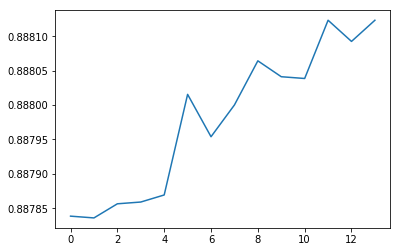

In [234]:
scores = [x[1] for x in grid.grid_scores_]
plt.plot(range(0,len(scores)), scores)
plt.show()

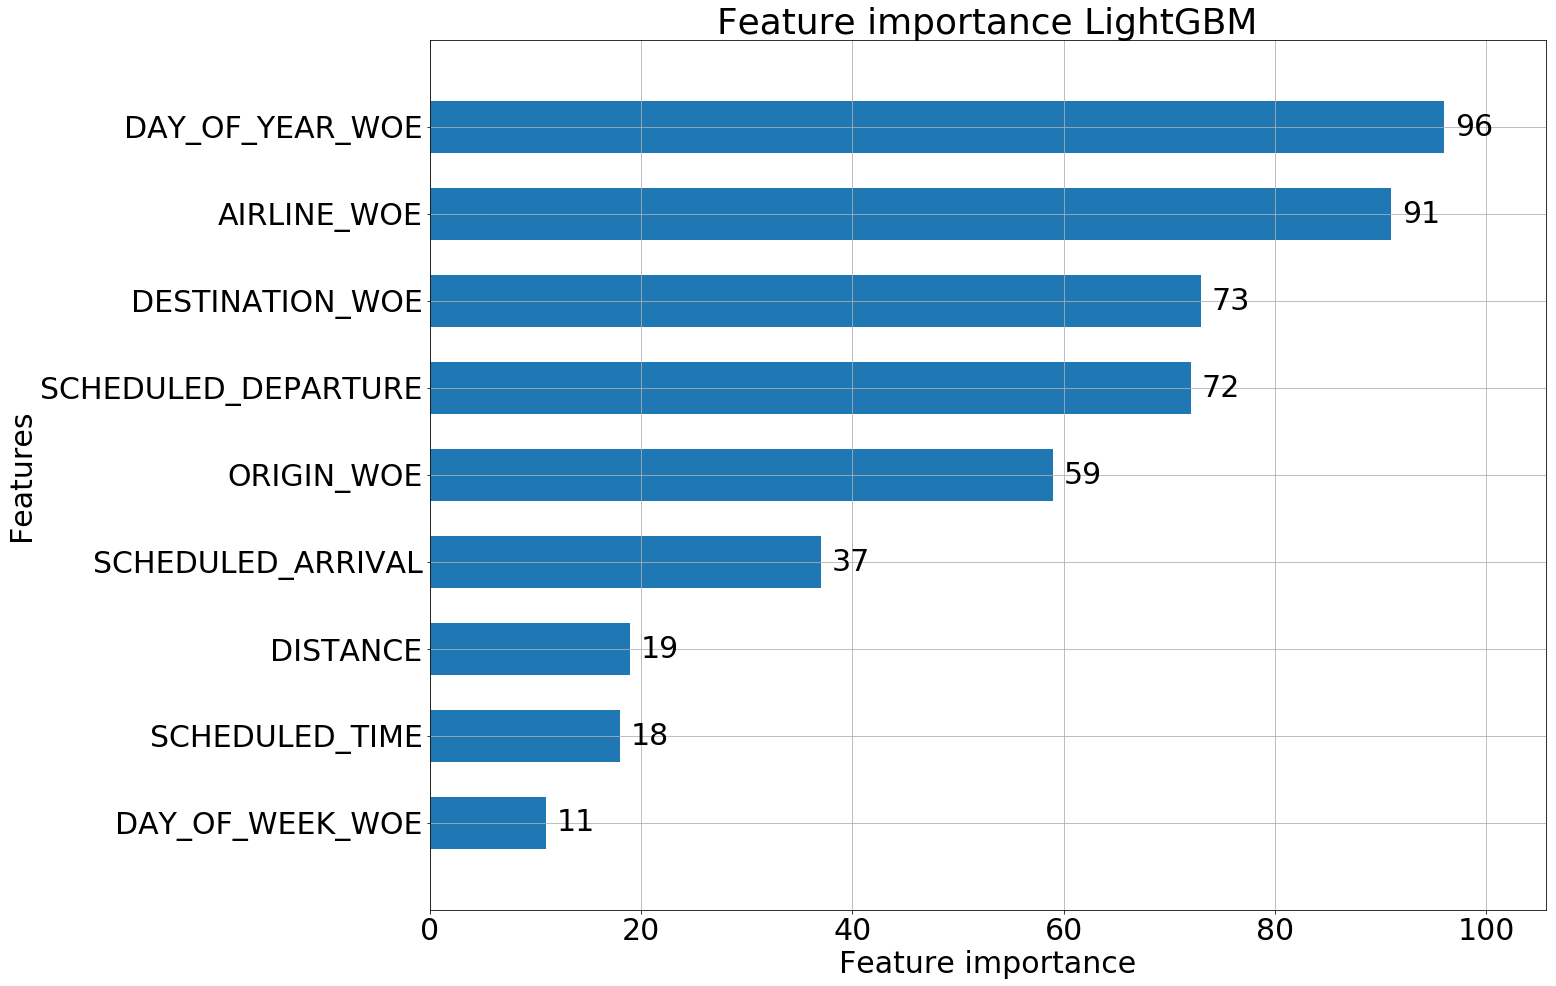

In [250]:
fig, ax = plt.subplots(1,1,figsize=(20,16))
matplotlib.rcParams.update({'font.size': 30})
lgb.plot_importance(classifier, max_num_features=12, height=0.6, ax=ax, title="Feature importance LightGBM")
plt.show()

In [181]:
#Baseline
print accuracy_score(y_pred=np.zeros(len(y_test)), y_true=y_test)

0.886787878788


In [184]:
#check candidates for LightGBM
for ds in range(1,13):
    dataset_train = ds
    dataset_test = ds

    print ds
    X_train = pd.read_csv('datasets/{}_X_train.csv'.format(dataset_train), low_memory=False)
    X_test = pd.read_csv('datasets/{}_X_test.csv'.format(dataset_test), low_memory=False)
    y_train = pd.read_csv('datasets/{}_y_train.csv'.format(dataset_train), low_memory=False, header=None)
    y_test = pd.read_csv('datasets/{}_y_test.csv'.format(dataset_test), low_memory=False, header=None)
    print X_train.shape, X_test.shape, y_train.shape, y_test.shape

    y_train = pd.Series(y_train[0])
    y_test = pd.Series(y_test[0])
    print X_train.shape, X_test.shape, y_train.shape, y_test.shape
    classifier = lgb.LGBMClassifier().fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    print "Baseline:", accuracy_score(y_pred=np.zeros(len(y_test)), y_true=y_test)
    print accuracy_score(y_pred=y_pred, y_true=y_test)

1
(16750, 998) (8250, 998) (16750, 1) (8250, 1)
(16750, 998) (8250, 998) (16750,) (8250,)
Baseline: 0.888848484848
0.888848484848
2
(16750, 998) (8250, 998) (16750, 1) (8250, 1)
(16750, 998) (8250, 998) (16750,) (8250,)
Baseline: 0.892121212121
0.892
3
(16750, 999) (8250, 999) (16750, 1) (8250, 1)
(16750, 999) (8250, 999) (16750,) (8250,)
Baseline: 0.889212121212
0.889212121212
4
(382434, 9) (187970, 9) (382434, 1) (187970, 1)
(382434, 9) (187970, 9) (382434,) (187970,)
Baseline: 0.885614725754
0.88559876576
5
(389599, 9) (191516, 9) (389599, 1) (191516, 1)
(389599, 9) (191516, 9) (389599,) (191516,)
Baseline: 0.887774389607
0.887774389607
6
(389556, 9) (191344, 9) (389556, 1) (191344, 1)
(389556, 9) (191344, 9) (389556,) (191344,)
Baseline: 0.887934818965
0.887934818965
7
(382464, 26) (188120, 26) (382464, 1) (188120, 1)
(382464, 26) (188120, 26) (382464,) (188120,)
Baseline: 0.884860727195
0.884860727195
8
(389695, 26) (191497, 26) (389695, 1) (191497, 1)
(389695, 26) (191497, 26) (3